In [1]:
from cvutils import imread, imshow
from cvutils import transform as tf
import numpy as np

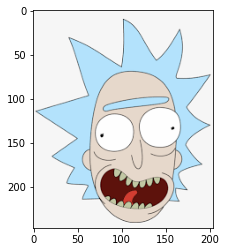

In [2]:
image_path = '../asset/rick.png'

image = imread(image_path)
imshow(image)

image_mean = image.reshape(-1, 3).mean(0).reshape(3, 1, 1)
image_std = image.reshape(-1, 3).std(0).reshape(3, 1, 1)

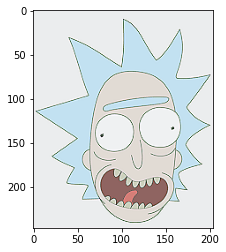

In [62]:
fn = tf.RandomSharpening([0.5, 1.0])
transpose_to_torch = tf.TransposeTorch()
untranspose_to_torch = tf.UntransposeTorch()
norm = tf.Normalize()
de_norm = tf.DeNormalize(image_mean, image_std)

image = transpose_to_torch(image)
_image = norm(image)
_image = fn(_image)
_image = de_norm(_image)

_image = untranspose_to_torch(_image)

imshow(_image)